# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
import csv
import random
from collections import Counter
from source.textnormalization import TextNormalization
from source.machinelearning import machine_learning_model, fit_model, metrics_values, confusion_matrix_
from source.deeplearning import convolutional_neural_network_1d, model_compile, model_fit, evaluate, plot_accuracy_loss, lstm_
from source.sentimentinformation import sentiment_percentage, sentiment_counts
from source.wordcloud import wordcloud
from source.most_frequent_word_plot import go_figure, bar_plot
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(40)
tf.random.set_seed(40)

# Download Some Packages

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [4]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
Corpus = pd.concat([df1, df2], ignore_index=True)
Corpus.rename(columns={'text': 'Review', 'sentiment': 'Sentiment'}, inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].map({'neg': 'Negative', 'pos': 'Positive'})
Corpus.head(5)

,Review,Sentiment
0,"Now, I won't deny that when I purchased this o...",Negative
1,"The saddest thing about this ""tribute"" is that...",Negative
2,Last night I decided to watch the prequel or s...,Negative
3,I have to admit that i liked the first half of...,Negative
4,I was not impressed about this film especially...,Negative


# Sentiment Information

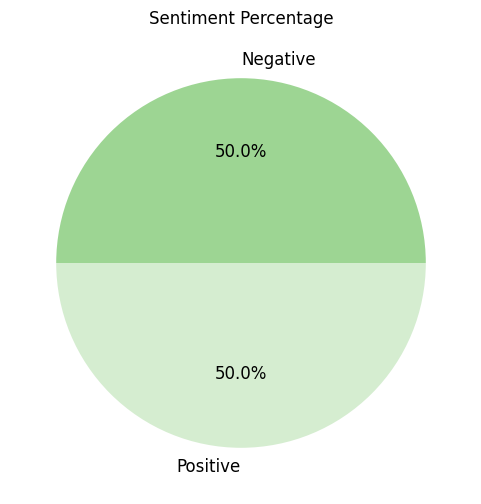

In [5]:
sentiment_percentage(Corpus, 'Sentiment', (6, 6))

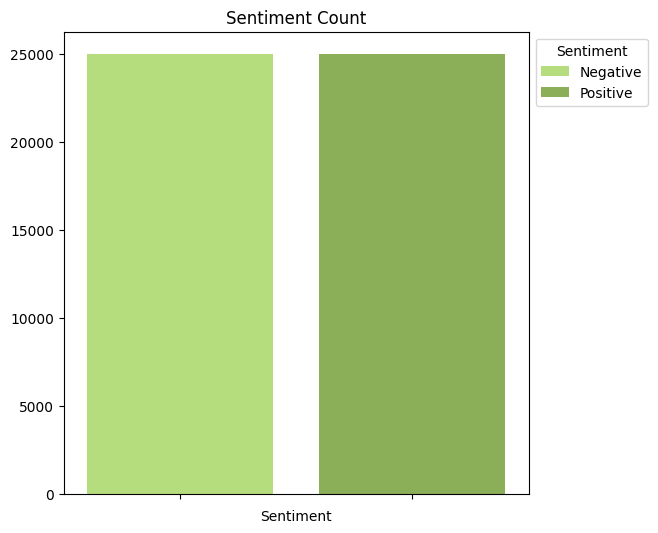

In [6]:
sentiment_counts(Corpus, 'Sentiment', (6, 6))

# Number Of Sentences

In [7]:
Corpus['NumberOfSentences'] = Corpus['Review'].apply(lambda n:len(sent_tokenize(n)))
Corpus.drop(Corpus[Corpus["NumberOfSentences"] == 0].index, inplace = True)


In [8]:
Corpus['NumberOfSentences'].sum()

537072

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

11

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

282

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# Text Normalization

In [12]:
text_normalization = TextNormalization(_string_lower = True, 
                        _remove_emojis = True, 
                        _remove_hashtags = False, 
                        _remove_emails = False,
                        _remove_url = True, 
                        _remove_mention = True, 
                        _remove_duplicate_char = True,
                        _remove_single_char = True, 
                        _remove_new_line_char = True, 
                        _remove_number = True, 
                        _remove_html_tags = True, 
                        _remove_special_character = True, 
                        _remove_longest_than = True, 
                        _remove_whitespace = True, 
                        _remove_unicode_characters = True,
                        _stemmer = False, 
                        _remove_non_english = True, 
                        _remove_stop_words = True, 
                        _lemmatizer = True)

In [13]:
Corpus['Normalized_Review'] = Corpus['Review'].apply(lambda x: text_normalization.normalization(x))
Corpus

,Review,Sentiment,NumberOfSentences,Normalized_Review
0,"Now, I won't deny that when I purchased this o...",Negative,8,deny purchase ebay high expectations incredibl...
1,"The saddest thing about this ""tribute"" is that...",Negative,7,saddest tribute singers include incredibly tal...
2,Last night I decided to watch the prequel or s...,Negative,6,last night decide watch prequel say call prequ...
3,I have to admit that i liked the first half of...,Negative,13,admit like first half sleepers look act story ...
4,I was not impressed about this film especially...,Negative,5,impress film especially go cinema family faith...
...,...,...,...,...
49995,"For one thing, he produced this movie. It has ...",Negative,10,produce movie feel later movies international ...
49996,The title comes from an alteration an adolesce...,Positive,23,title come alteration adolescent inmate correc...
49997,Christopher Nolan's first film is a 'no budget...,Positive,4,christopher nolan first film budget black whit...
49998,The story is shortly about the faith-lacking b...,Negative,11,story shortly faith lack business man priest d...


# Number Of Unique Words

In [14]:
UniqueWords = set()
for word in Corpus['Normalized_Review'].str.split():
    UniqueWords.update(word)

len(UniqueWords)

85404

# WordCloud

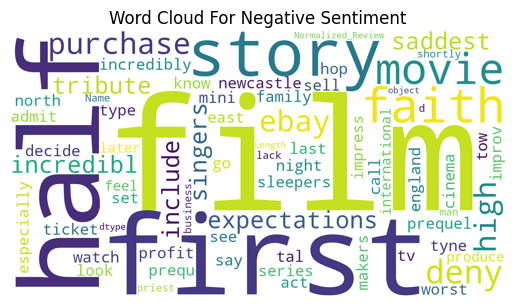

In [15]:
wordcloud(data=Corpus, target='Negative', width=1500, hieght=800, text='Normalized_Review')

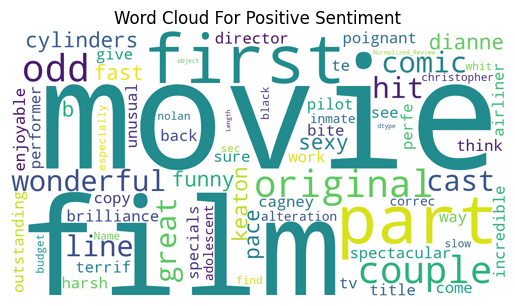

In [16]:
wordcloud(data=Corpus, target='Positive', width=1500, hieght=800, text='Normalized_Review')

# Most Frequent Words 

In [17]:
MostFrequentWord = Counter((Corpus['Normalized_Review']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'))
MostFrequentWordDF

,Word,Count
0,film,95883
1,movie,87971
2,like,44311
3,see,41665
4,time,31920
5,make,30288
6,character,28361
7,watch,27863
8,think,24483
9,story,23121


In [18]:
go_figure(data=MostFrequentWordDF)

In [19]:
bar_plot(data=MostFrequentWordDF)

# Number Of Words 

In [20]:
Corpus["Number of Words"] = Corpus["Normalized_Review"].apply(lambda n:len(word_tokenize(n)))
Corpus.drop(Corpus[ Corpus["Number of Words"] == 0].index, inplace = True)
Corpus["Number of Words"].sum()

5129594

# Number Of Charachters 

In [21]:
Corpus["Number of Charachters"] = Corpus["Normalized_Review"].str.len()
Corpus["Number of Charachters"].sum()

34301984

# Average Number Of Words 

In [22]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words"].mean())))
AverageNaumberOfWords

103

# Average Number Of Charachters 

In [23]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters"].mean()))
AverageNumberOfCharachters

686

# Maximum Number Of Word

In [24]:
MaximumNaumberOfWords = Corpus["Number of Words"].max()
MaximumNaumberOfWords

1275

# Maximum Number Of Charachters 

In [25]:
MaximumNumberOfCharachters = Corpus['Number of Charachters'].max() 
MaximumNumberOfCharachters

7937

# Minimum Number Of Words

In [26]:
MimimumNaumberOfWords = Corpus["Number of Words"].min()
MimimumNaumberOfWords

3

# Minimum Number Of Charachters 

In [27]:
MinimumNumberOfCharachters = Corpus['Number of Charachters'].min() 
MinimumNumberOfCharachters

17

# Split The Dataset Into X And y

In [28]:
X, y = Corpus['Normalized_Review'], Corpus['Sentiment']
le = LabelEncoder()
y =le.fit_transform(y)

# Split The Dataset Into Training And Testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=33, stratify=y)

# CountVectorizer

In [30]:
CountVectorizer_ = CountVectorizer()
X_train_CV_ = CountVectorizer_.fit_transform(X_train)
X_test_CV_ = CountVectorizer_.transform(X_test)

In [31]:
Vocabulary = CountVectorizer_.vocabulary_
Vocabulary

{'time': 64876,
 'see': 57033,
 'film': 22816,
 'maybe': 40203,
 'zabriskie': 72477,
 'point': 49555,
 'felt': 22475,
 'way': 70384,
 'woody': 71598,
 'allen': 1605,
 'like': 37313,
 'year': 72162,
 'period': 48274,
 'realize': 52617,
 'filmmaker': 22850,
 'ahead': 1156,
 'go': 26095,
 'michelangelo': 41352,
 'antonioni': 2637,
 'try': 66362,
 'make': 39066,
 'inside': 32070,
 'red': 52867,
 'desert': 16525,
 'blow': 6896,
 'china': 11113,
 'passenger': 47620,
 'native': 43928,
 'italy': 32870,
 'sense': 57262,
 'learn': 36659,
 'ways': 70398,
 'country': 13931,
 'mastery': 39972,
 'medium': 40696,
 'result': 53795,
 'show': 58266,
 'lack': 35948,
 'mean': 40573,
 'present': 50481,
 'image': 30994,
 'feel': 22396,
 'tone': 65267,
 'color': 12389,
 'sound': 60093,
 'visual': 69640,
 'representation': 53555,
 'era': 20664,
 'director': 17274,
 'job': 33617,
 'state': 61037,
 'disappoint': 17331,
 'admirer': 709,
 'post': 50039,
 'fifties': 22760,
 'work': 71657,
 'say': 56197,
 'avventur

# Machine Learning

**1-Naive Bayes**

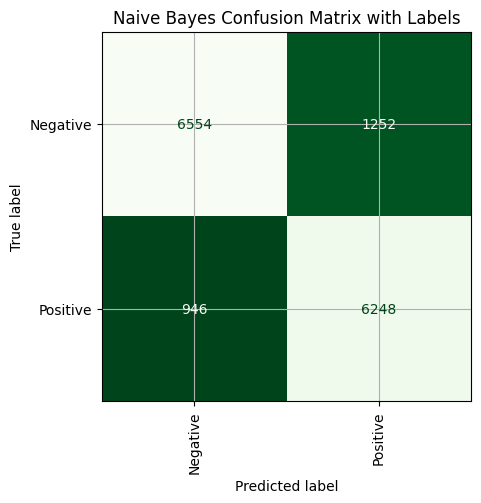

In [32]:
Algorithm = MultinomialNB(alpha= 1)
Naive_Bayes = machine_learning_model(algorithm=Algorithm)
fit_model(model=Naive_Bayes, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Naive_Bayes, X_test=X_test_CV_, y_test=y_test, name='Naive Bayes')

In [33]:
metrics_values(model= Naive_Bayes, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.853467
Precision,0.868502
Recall,0.833067
F1Score,0.850415
Error,0.146533


**2-Logistic Regression**

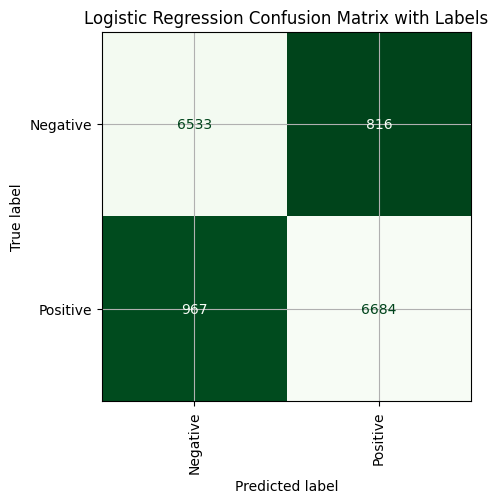

In [34]:
Algorithm = LogisticRegression()
Logistic_Regression = machine_learning_model(algorithm=Algorithm)
fit_model(model=Logistic_Regression, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(Logistic_Regression, X_test=X_test_CV_, y_test=y_test, name='Logistic Regression')

In [35]:
metrics_values(model= Logistic_Regression, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.881133
Precision,0.873611
Recall,0.891200
F1Score,0.882318
Error,0.118867


**3-Decision Tree**

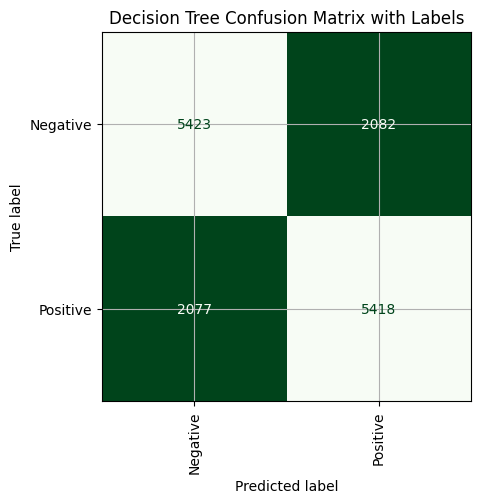

In [36]:
Algorithm = DecisionTreeClassifier(criterion='entropy')
Decision_Tree = machine_learning_model(algorithm=Algorithm)
fit_model(model=Decision_Tree, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Decision_Tree, X_test=X_test_CV_, y_test=y_test, name='Decision Tree')

In [37]:
metrics_values(model= Decision_Tree, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.722733
Precision,0.722882
Recall,0.722400
F1Score,0.722641
Error,0.277267


**4-K Nearest Neighbors**

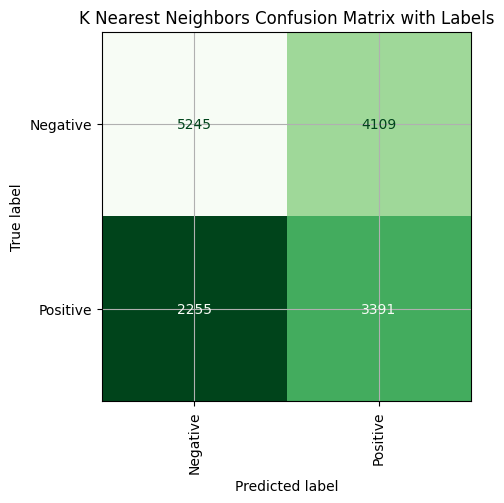

In [38]:
Algorithm =KNeighborsClassifier(metric='manhattan', n_neighbors=5)
K_Nearest_Neighbors = machine_learning_model(algorithm=Algorithm)
fit_model(model=K_Nearest_Neighbors, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test, name='K Nearest Neighbors')

In [39]:
metrics_values(model= K_Nearest_Neighbors, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.575733
Precision,0.600602
Recall,0.452133
F1Score,0.515898
Error,0.424267


**5-Random Forest**

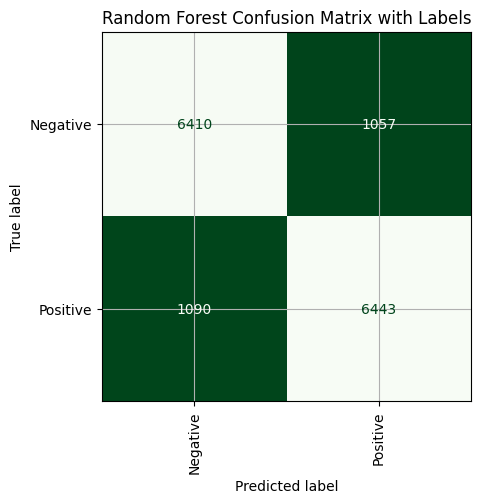

In [40]:
Algorithm = RandomForestClassifier(criterion = 'gini', n_estimators=100)
Random_Forest = machine_learning_model(algorithm=Algorithm)
fit_model(model=Random_Forest, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=Random_Forest, X_test=X_test_CV_, y_test=y_test, name='Random Forest')

In [41]:
metrics_values(model= Random_Forest, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.856867
Precision,0.855303
Recall,0.859067
F1Score,0.857181
Error,0.143133


**6-SGD Classifier**

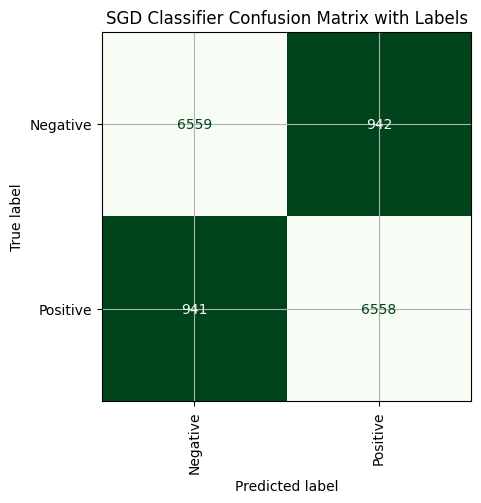

In [42]:
Algorithm = SGDClassifier(loss='hinge')
SGD = machine_learning_model(algorithm=Algorithm)
fit_model(model=SGD, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=SGD, X_test=X_test_CV_, y_test=y_test, name='SGD Classifier')

In [43]:
metrics_values(model= SGD, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.874467
Precision,0.874517
Recall,0.874400
F1Score,0.874458
Error,0.125533


**7-Multilayer Perceptron**

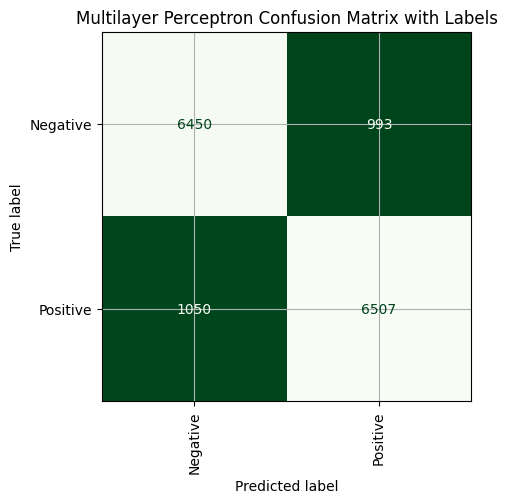

In [44]:
Algorithm = MLPClassifier(hidden_layer_sizes=16)
MLP = machine_learning_model(algorithm=Algorithm)
fit_model(model=MLP, X_train=X_train_CV_, y_train=y_train)
confusion_matrix_(model=MLP, X_test=X_test_CV_, y_test=y_test, name='Multilayer Perceptron')

In [45]:
metrics_values(model= MLP, X_test=X_test_CV_, y_test=y_test)

,Values
Accuracy,0.863800
Precision,0.861056
Recall,0.867600
F1Score,0.864316
Error,0.136200


# Deep Learning

In [46]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(X_train)
embedding_dim = 16
vocab_size = len(tokenizer.word_index)
vocab_size

72930

In [47]:
X_train_seqs = tokenizer.texts_to_sequences(X_train)
X_test_seqs = tokenizer.texts_to_sequences(X_test)
max_length =  max([len(x) for x in X_train_seqs])
max_length

1004

In [48]:
encoded_X_train = pad_sequences(X_train_seqs, maxlen=max_length, padding='pre', truncating='pre')
encoded_X_test = pad_sequences(X_test_seqs, maxlen=max_length, padding='pre', truncating='pre')

In [49]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    patience=0
                )

**8-Convolutional Neural Network**

Epoch 1/20
1094/1094 [==============================] - 317s 285ms/step - loss: 0.5743 - accuracy: 0.7055 - val_loss: 0.4061 - val_accuracy: 0.8611
Epoch 2/20
1094/1094 [==============================] - 174s 159ms/step - loss: 0.3890 - accuracy: 0.8497 - val_loss: 0.3324 - val_accuracy: 0.8750
Epoch 3/20
1094/1094 [==============================] - 99s 90ms/step - loss: 0.3259 - accuracy: 0.8750 - val_loss: 0.3046 - val_accuracy: 0.8807
Epoch 4/20
1094/1094 [==============================] - 78s 71ms/step - loss: 0.2817 - accuracy: 0.8966 - val_loss: 0.2919 - val_accuracy: 0.8802
Epoch 5/20
1094/1094 [==============================] - 72s 65ms/step - loss: 0.2555 - accuracy: 0.9074 - val_loss: 0.2888 - val_accuracy: 0.8860
Epoch 6/20
1094/1094 [==============================] - 75s 68ms/step - loss: 0.2312 - accuracy: 0.9177 - val_loss: 0.2873 - val_accuracy: 0.8815
Epoch 7/20
1094/1094 [==============================] - 72s 66ms/step - loss: 0.2158 - accuracy: 0.9229 - val_loss: 0.29

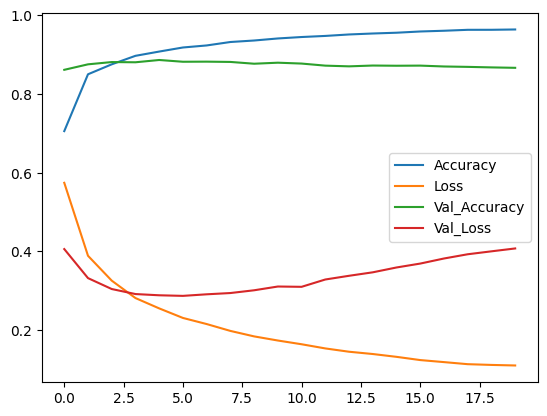

 
The Training Loss is 0.0332, And Training Accuracy is 0.9932
 
The Testing Loss is 0.4076, And Testing Accuracy is 0.8661


In [50]:
convolutional_neural_network = convolutional_neural_network_1d(vocab_size=vocab_size, embedding_dim=embedding_dim, max_length=max_length, dropout=0.8, kernel=8, filters=32)
model_compile(model=convolutional_neural_network)
history = model_fit(model=convolutional_neural_network, X_train=encoded_X_train, y_train=y_train, epochs=20, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=convolutional_neural_network, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=convolutional_neural_network, x=encoded_X_test, y=y_test, train_test='Testing')

**9-LSTM**

Epoch 1/10
1094/1094 [==============================] - 414s 365ms/step - loss: 0.3996 - accuracy: 0.8152 - val_loss: 0.3076 - val_accuracy: 0.8749
Epoch 2/10
1094/1094 [==============================] - 247s 226ms/step - loss: 0.2082 - accuracy: 0.9226 - val_loss: 0.3374 - val_accuracy: 0.8661
Epoch 3/10
1094/1094 [==============================] - 203s 186ms/step - loss: 0.1265 - accuracy: 0.9559 - val_loss: 0.3340 - val_accuracy: 0.8766
Epoch 4/10
1094/1094 [==============================] - 194s 178ms/step - loss: 0.0807 - accuracy: 0.9729 - val_loss: 0.4307 - val_accuracy: 0.8747
Epoch 5/10
1094/1094 [==============================] - 182s 166ms/step - loss: 0.0566 - accuracy: 0.9811 - val_loss: 0.5340 - val_accuracy: 0.8649
Epoch 6/10
1094/1094 [==============================] - 188s 171ms/step - loss: 0.0443 - accuracy: 0.9853 - val_loss: 0.5270 - val_accuracy: 0.8679
Epoch 7/10
1094/1094 [==============================] - 178s 163ms/step - loss: 0.0335 - accuracy: 0.9893 - val_

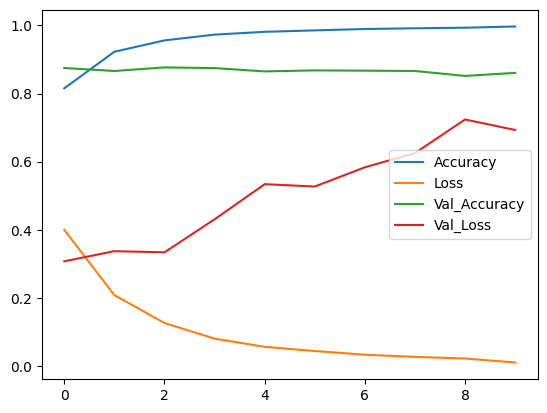

 
The Training Loss is 0.0058, And Training Accuracy is 0.9988
 
The Testing Loss is 0.6930, And Testing Accuracy is 0.8606


In [51]:
LSTM = lstm_(vocab_size= vocab_size, embedding_dim= embedding_dim, max_length= max_length, dropout=0.2, units=128)
model_compile(model=LSTM)
history = model_fit(model=LSTM, X_train=encoded_X_train, y_train=y_train, epochs=10, X_test=encoded_X_test, y_test=y_test, batch_size=32, Callback=Callback)
plot_accuracy_loss(histoty=history)
evaluate(model=LSTM, x=encoded_X_train, y=y_train, train_test='Training')
evaluate(model=LSTM, x=encoded_X_test,y= y_test, train_test='Testing')